In [125]:
import numpy as np

In [126]:
x_in = np.genfromtxt('../ass1_data/linearX.csv',delimiter=',')
y = np.genfromtxt('../ass1_data/linearY.csv',delimiter=',')

In [127]:
theta = np.zeros(2)

In [128]:
# x_un : unnormalized data
x_un = np.copy(x_in)
mean = x_in.mean()
std_dev = np.std(x_in)
x_in = (x_in - x_in.mean())/np.std(x_in)
rate = 1.9
n = 2
m = x_in.size

In [129]:
# x_in = x_in[:,np.newaxis]
X = np.ones((m,n))
X[:,0] = x_in
# print(X)

In [130]:
X_T = np.transpose(X)
iter = 0
while True:
    iter+=1
    delta_J = (np.matmul(np.matmul(X_T,X), theta) - np.matmul(X_T,y))
    theta = theta - (rate/m) * delta_J
#     print(delta_J)
#     max_change = max(abs(delta_J[0]),abs(delta_J[1]))
#     print(max_change)
    max_change = abs(max(delta_J, key=abs))
    if(max_change < 1e-8):
        break
print(iter)

220


In [131]:
y_pred = np.matmul(X,theta)

In [132]:
theta

array([0.0013402, 0.9966201])

In [133]:
theta_req = np.array([theta[0]/std_dev, theta[1] - theta[0] * (mean / std_dev)])

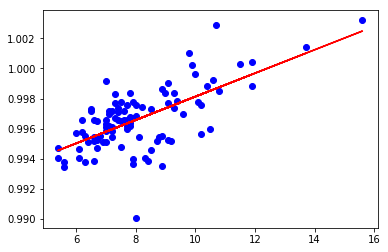

In [134]:
import matplotlib.pyplot as plt
plt.plot(x_un,y,'ro',color='blue')
plt.plot(x_un,y_pred,color='red')
# plt.scatter(x,y,color='red')
# plt.scatter(x,y1,color='blue')
plt.show()

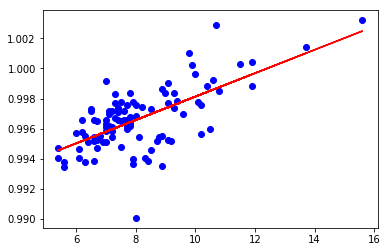

In [135]:
X_un = np.ones((m,n))
X_un[:,0] = x_un
y_pred1 = np.matmul(X_un,theta_req)
plt.plot(x_un,y,'ro',color='blue')
plt.plot(x_un,y_pred1,color='red')